In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Linear algebra

## Session 09: 

## Gerhard Jäger

### June 29, 2022

## Orthogonal projections

Suppose we have two vectors $\mathbf a$ and $\mathbf b$. We want to find the *orthogonal projection from $\mathbf a$ onto the line through $\mathbf b$*. This is a vector $\mathbf p$ with the properties:

- $\mathbf p = x\mathbf b$ ($\mathbf p$ lies on the line defined by $\mathbf a$)
- $\mathbf a - \mathbf p$ is orthogonal to $\mathbf b$

Here is how we find $\mathbf p$:

$$
\begin{aligned}
(\mathbf a - x\mathbf b)^T\mathbf b &= 0\\
(\mathbf a^T - x\mathbf b^T)\mathbf b &= 0\\
\mathbf a^T\mathbf b - x\mathbf b^T\mathbf b &= 0\\
\mathbf a^T\mathbf b &= x\mathbf b^T\mathbf b\\
x &= \frac{\mathbf a^T\mathbf b}{\mathbf b^T\mathbf b}\\
\mathbf p &= \frac{\mathbf a^T\mathbf b}{\mathbf b^T\mathbf b}\mathbf b\\
\end{aligned}
$$

- $\mathbf p$ is called the *projection of $\mathbf a$ onto the line throuhg $\mathbf b$*.
- $\mathbf e = \mathbf a - \mathbf p$ is called the *error*.
- $\mathbf p$ is the point on the line through $\mathbf b$ which is closest to $\mathbf a$, i.e., the point which minimizes the error.

## Orthogonal projections

Now suppose we have a matrix $A$ and a vector $\mathbf b$, and we want to find the *orthogonal projection of  $\mathbf b$ onto the* ***column space*** of $A$.

In other words, we want to find the point $\mathbf p$ which

- is in the column space of $A$, and
- minimizes the error $\mathbf b-\mathbf p$.

<img src=_img/projection.svg>

(image from https://medium.com/linear-algebra/part-17-projections-122aac21b07c)



- assumptions:

$$
\begin{aligned}
Ax &= \mathbf p\\
\mathbf p + \mathbf e &= \mathbf b\\
A^T\mathbf e &= \mathbf 0
\end{aligned}
$$

- finding the solution

Let us assume that the columns of $A$ are independent. (If this is not the case, we can replace $A$ by some basis of $C(A)$.





**Observation** $(A^TA)$ is invertible if and only if the columns of $A$ are independent.

*Proof*


Suppose $(A^TA)$ is invertible, and let $A\mathbf x = \mathbf 0$. Then it follows

$$
\begin{aligned}
A^TA\mathbf x &= A^T\mathbf 0\\
A^TA\mathbf x &= \mathbf 0\\
\mathbf x &= (A^TA)^{-1}\mathbf 0\\
&= \mathbf 0
\end{aligned}
$$
This entails that the columns of $A$ are independent.

Now suppose the columns of $A$ are independent. The Gauss-Jordan elimination factorizes

$$
A^T = E R,
$$
where $E$ is the combined elimination matrix and $R$ is the reduced row echelon form of $A^T$.

As shown last week, $E$ is invertible.

If the columns of $A$ are independent, $R$ contains $n$ pivot columns, and no free column. It follows that

$$
R^T R = \mathbf I,
$$

since the dot product of a pivot column with itself must be $1$, and the dot product of two different pivot columns must be $0$.



Then we have:

$$
\begin{aligned}
A^TA &= ERR^T E^T\\
&= E~\mathbf I~ E^T\\
&= E E^T\\
\end{aligned}
$$

By construction, $E$ is invertible. Therefore

$$
(A^TA)^{-1} = (E^{-1})^T E^{-1}
$$

$\dashv$

- deriving the solution:

$$
\begin{aligned}
A\mathbf x &= \mathbf p\\
\mathbf p + \mathbf e &= \mathbf b\\
A^T\mathbf e &= \mathbf 0\\
A^T\mathbf b &= A^T\mathbf p + A^T\mathbf e\\
A^T\mathbf b &= A^T\mathbf p\\
&= A^T A\mathbf x\\
\mathbf x &= (A^T A)^{-1}A^T\mathbf b\\
\mathbf p &= A(A^T A)^{-1}A^T\mathbf b\\
\end{aligned}
$$


### Projection matrix

The matrix

$$
P = A(A^TA)^{-1}A^T
$$

is the **projection matrix** that maps each vector to its projection onto the column space of $A$.

Each projection matrix $P$ has the property that $PP=P$

$$
\begin{aligned}
P &= A(A^TA)^{-1}A^T\\
PP &= A(A^TA)^{-1}A^TA(A^TA)^{-1}A^T\\
&= A(A^TA)^{-1}(A^TA)(A^TA)^{-1}A^T\\
&= A(A^TA)^{-1}A^T\\
&= P
\end{aligned}
$$

### Statistics interlude: Linear regression

**linear regression**

- independent variables: $m\times n$ matrix $X$
    - $n$: number of observations
    - $m$: number of independent variables
- dependent variable: length-$n$ vector $\mathbf y$
- goal: find parameter vector $\beta$ (length $m+1$) such that the *total squared error* is minimized

$$
\hat\beta = \arg_\beta\min \sum_i (\beta_1 + \sum_{j=1}^m \beta_{j+1}x_{i,j} - y)^2
$$

Let's rephrase this with linear algebra

$$
\begin{aligned}
X_1 &= [\mathbf 1 X]\\
\hat {\mathbf y} &= X_1\beta\\
\mathbf e &= ||\mathbf y - \hat {\mathbf y}||^2\\
\hat\beta &= \arg_\beta\min \mathbf e
\end{aligned}
$$

From the second equation we see that $\hat {\mathbf y}$ is in the column space of $X_1$. 

The goal is to find the point $\hat {\mathbf y}$ in the column space of $X_1$ that minimizes the squared distance to $\mathbf y$.

This is also the point that minimizes the absolute distance between $\hat {\mathbf y}$ and $\mathbf y$. In other words, $\hat {\mathbf y}$ is the projection of $\mathbf y$ onto the column space of $X_1$:

$$
\hat\beta = X_1(X_1^TX_1)^{-1}X_1^T\mathbf y
$$

If the columns of $X_1$ are not independent, $\hat\beta$ is not well-defined (and your statistics software will complain).

# Determinants

Consider the matrix 
$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

What is the area of the parallelogram defined by the two column vectors?

<IPython.core.display.Javascript object>


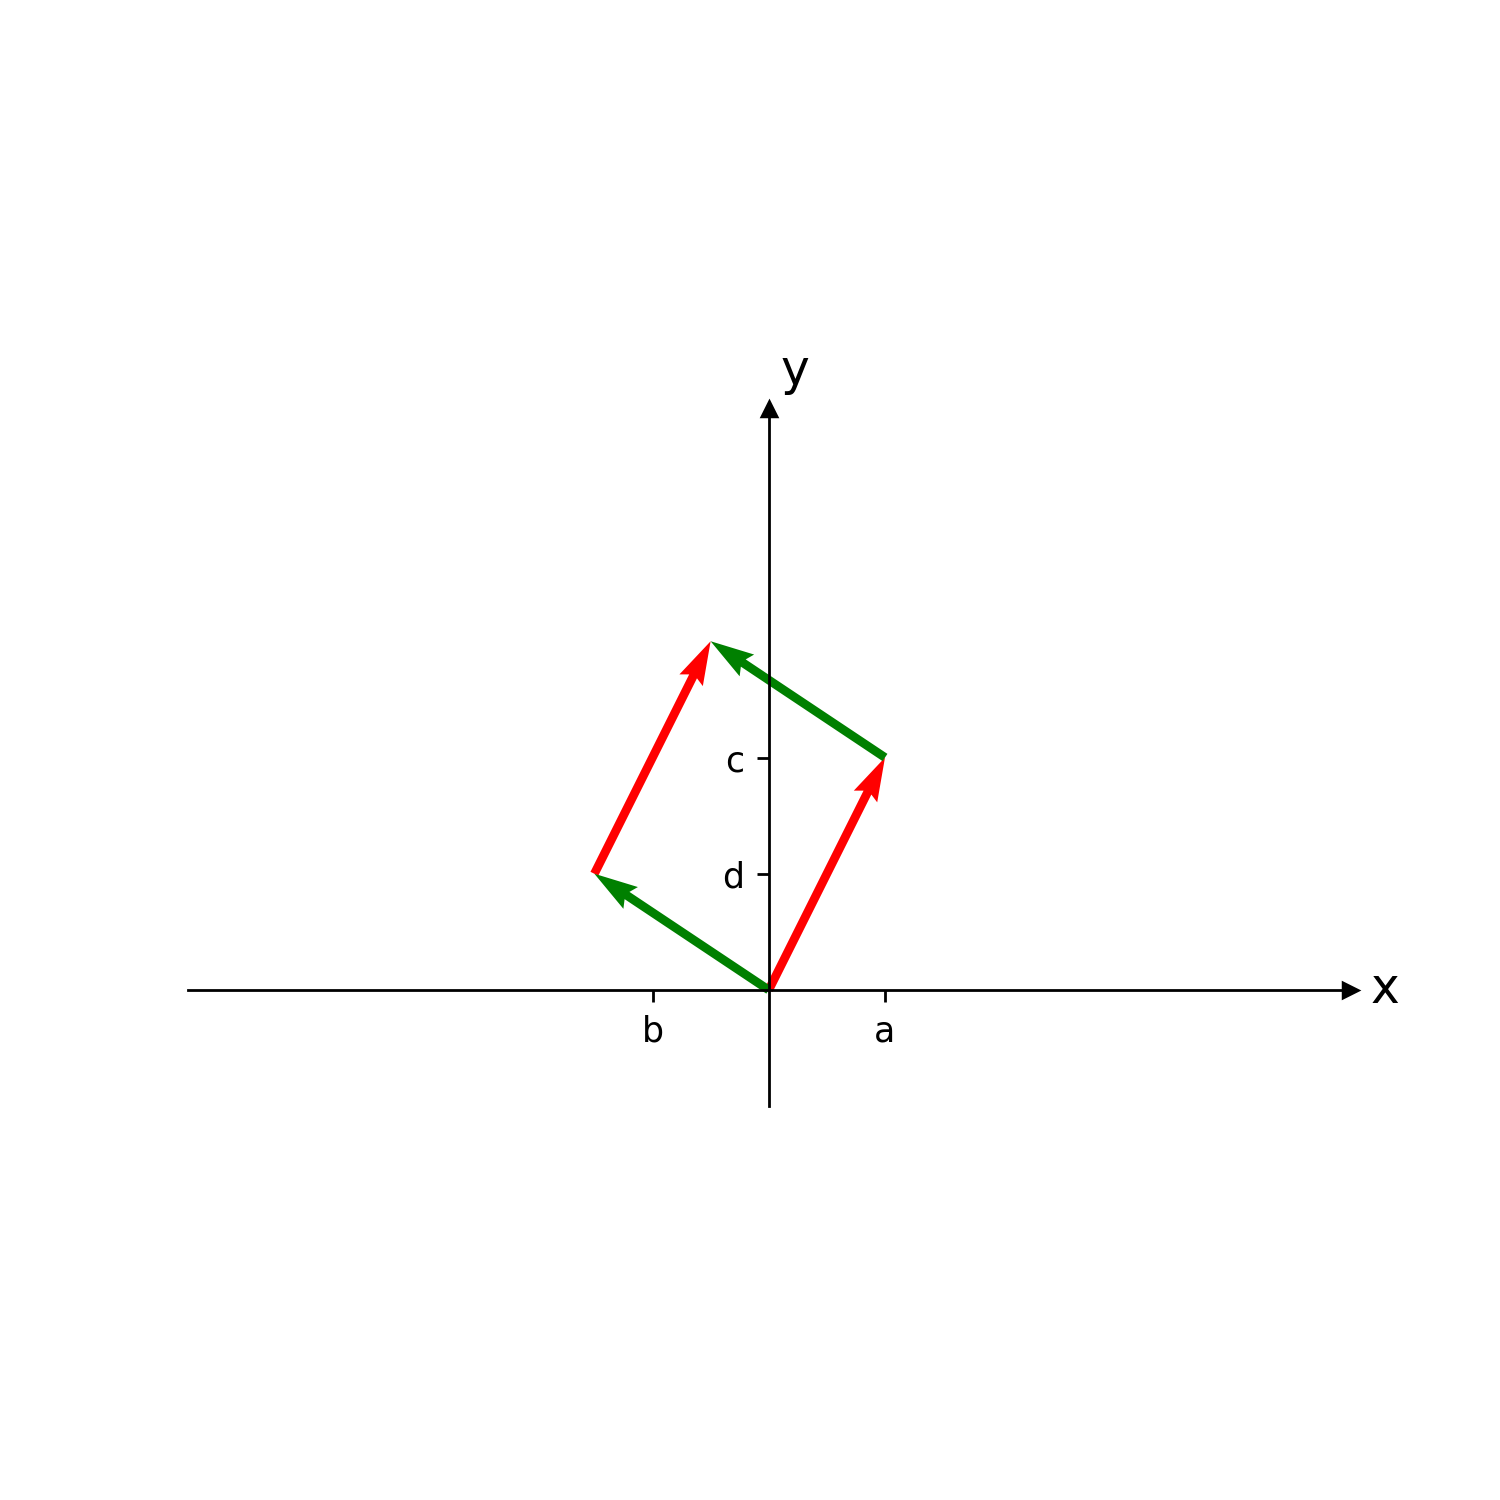

In [2]:
a, b, c, d = 2, -3, 4, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([-2,2])
ax.set_xticklabels(['b','a'])
ax.set_yticks([2,4])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

### horizontal elimination

$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix} \Rightarrow
\begin{bmatrix}
\frac{ad-bc}{d} & b \\
0 & d
\end{bmatrix} \Rightarrow
\begin{bmatrix}
\frac{ad-bc}{d} & 0 \\
0 & d
\end{bmatrix}
$$

<IPython.core.display.Javascript object>


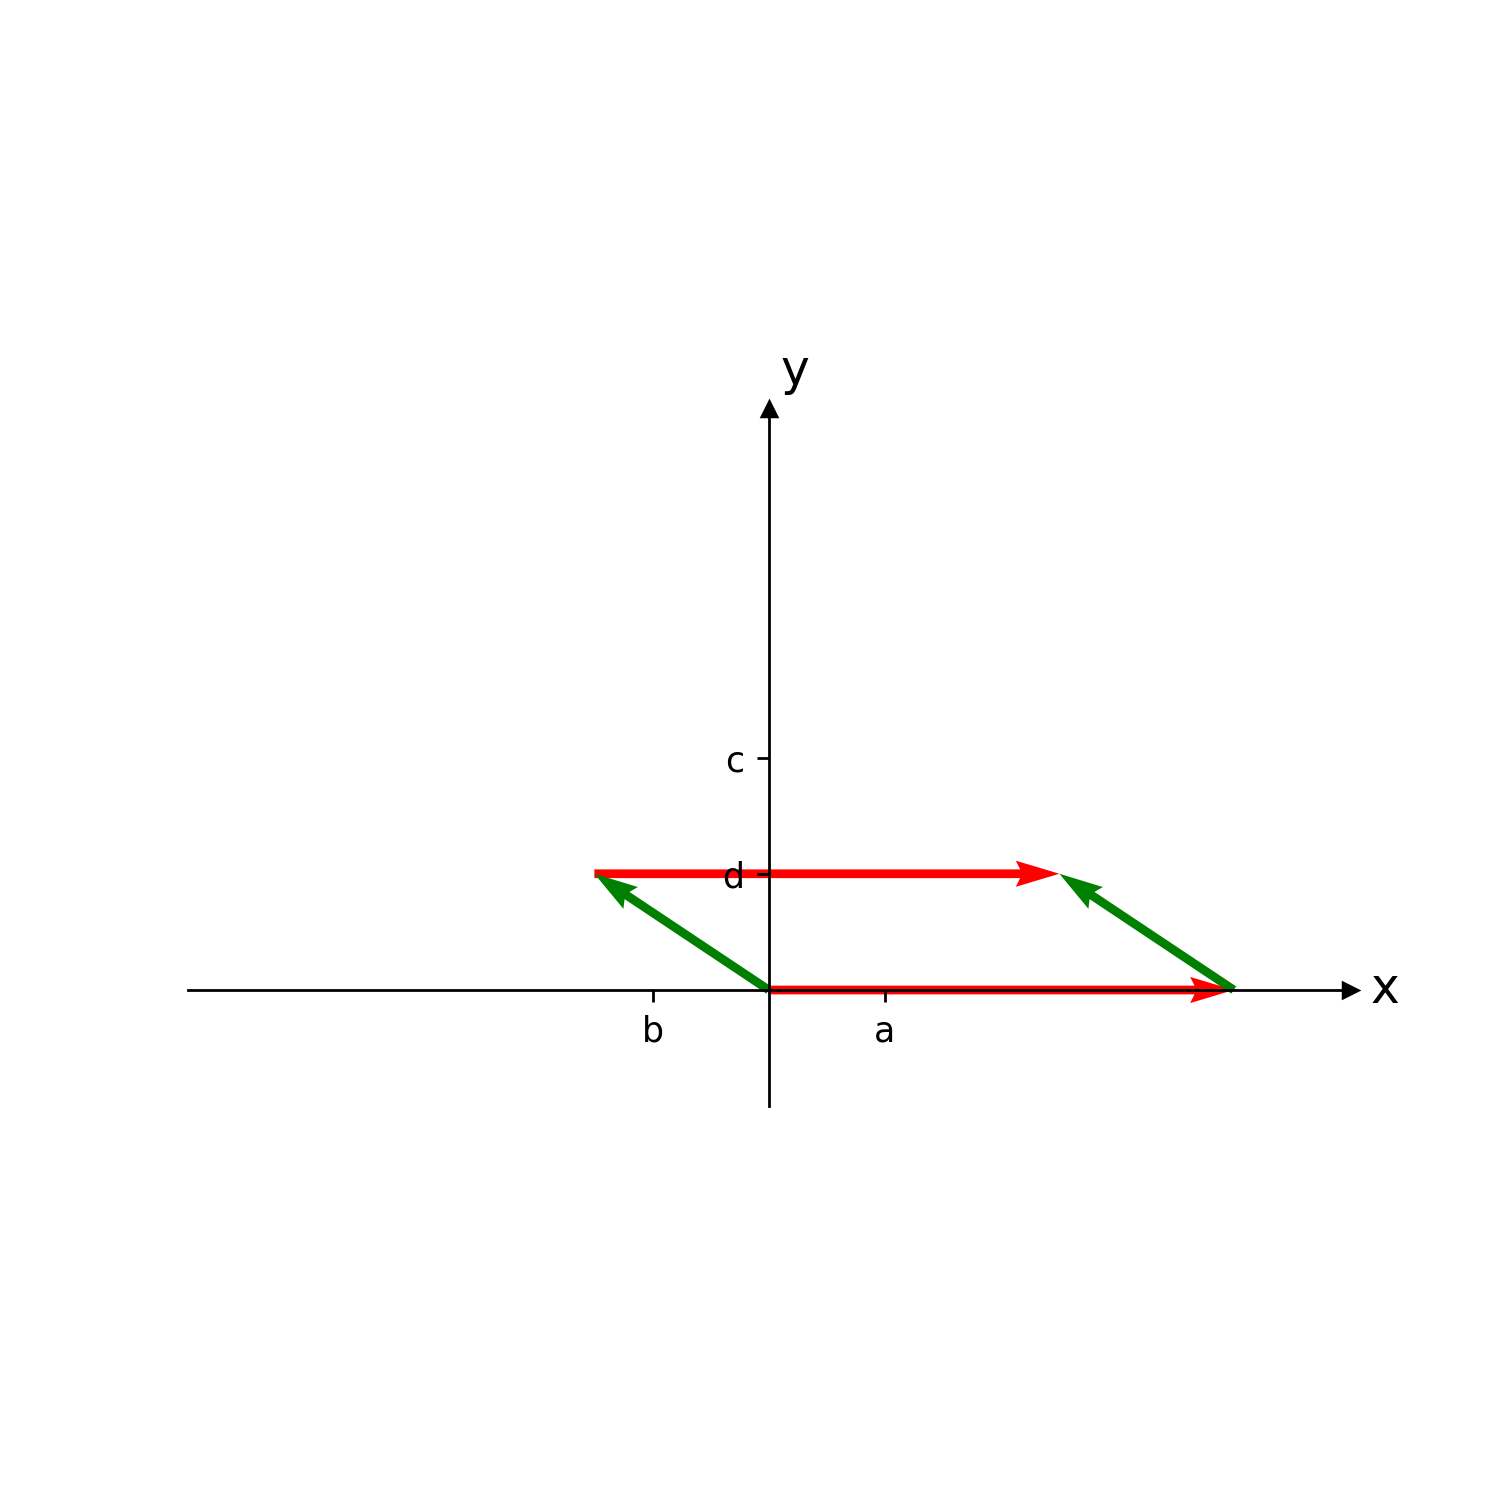

In [3]:
a, b, c, d = 8, -3, 0, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([-2,2])
ax.set_xticklabels(['b','a'])
ax.set_yticks([2,4])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

<IPython.core.display.Javascript object>


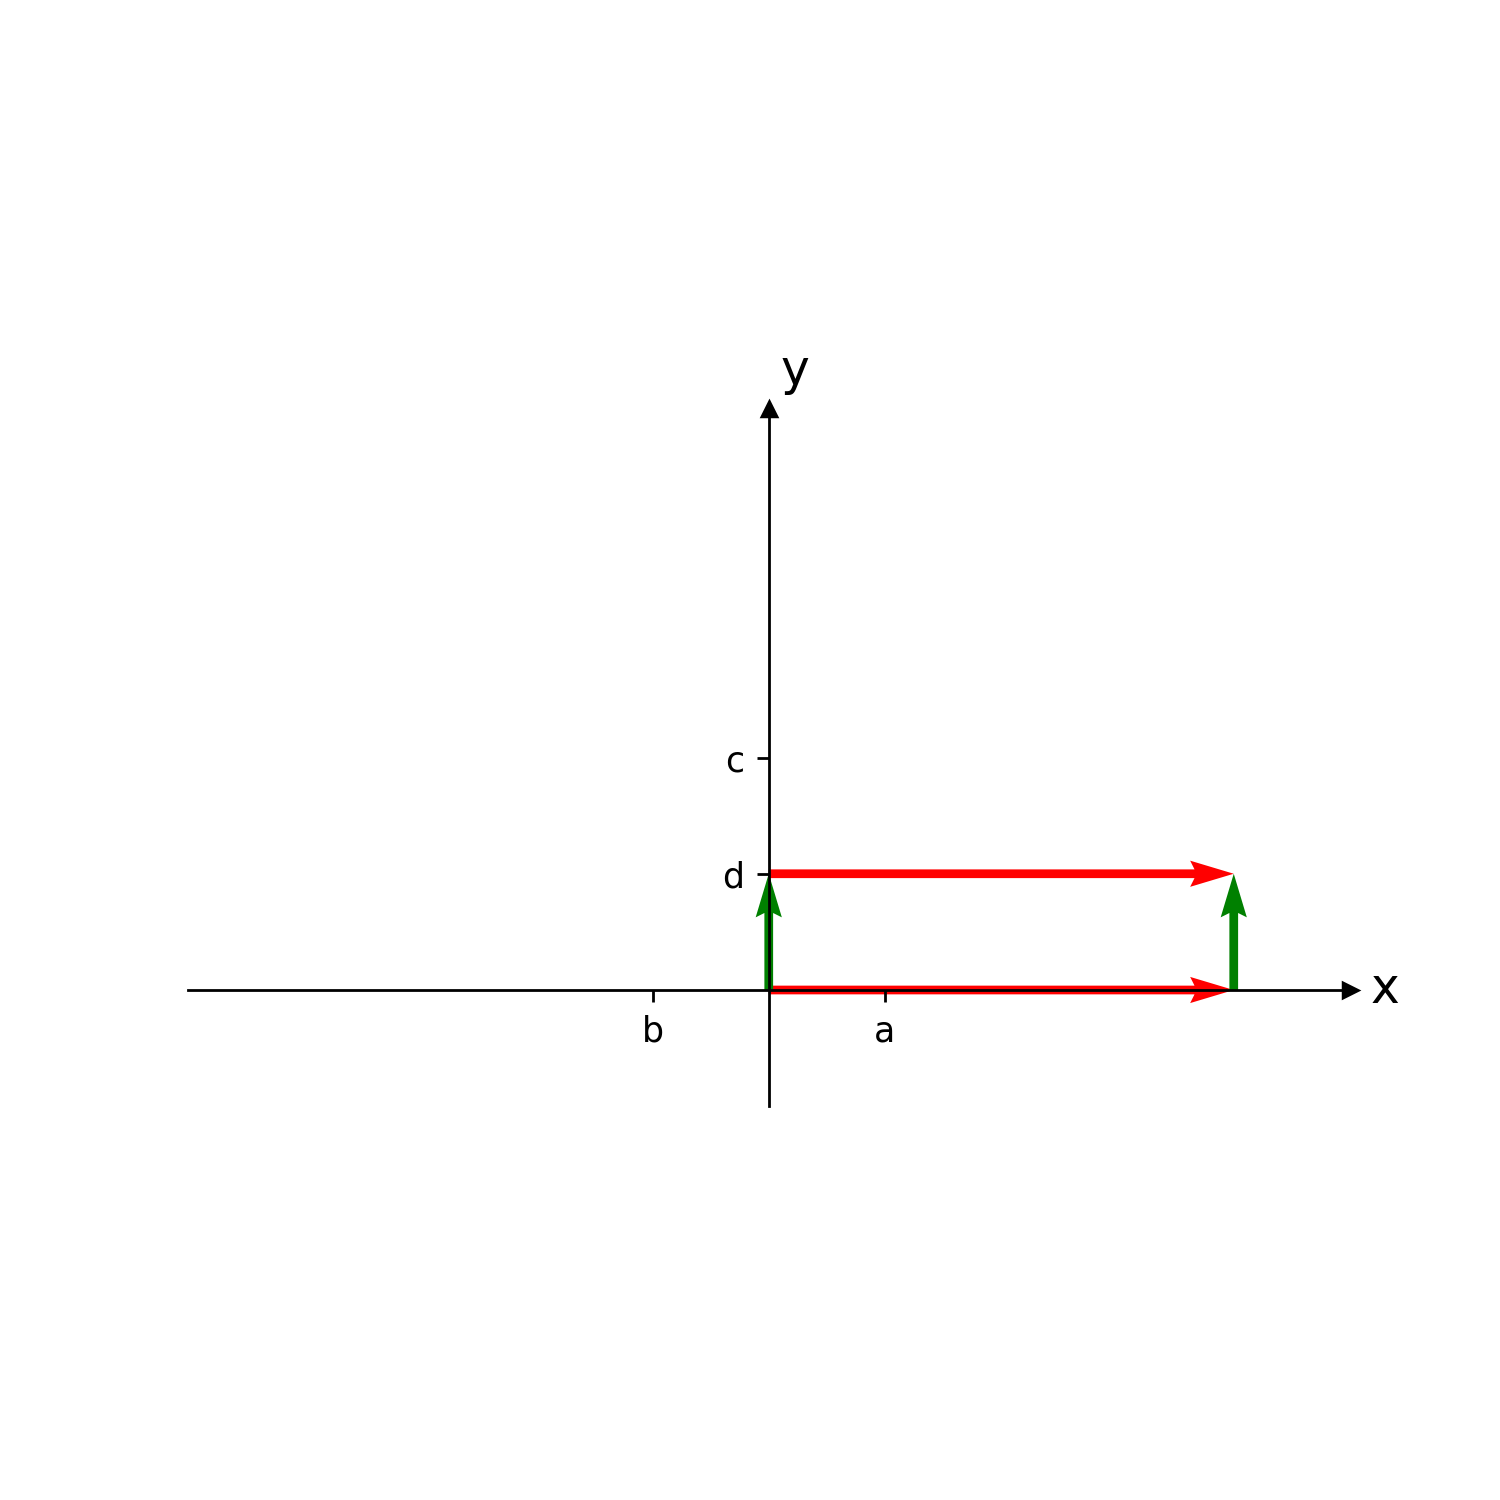

In [4]:
a, b, c, d = 8, 0, 0, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([-2,2])
ax.set_xticklabels(['b','a'])
ax.set_yticks([2,4])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

The area of this rectangle is

$$
ad-bc
$$

Since the geometric transformations  corresponding to elimination did not change the area, the original parallelogram also has the area $ad-bc$.

### Determinants

The determinant of a matrix $A$ is written as
$$
\displaystyle\mathrm{det}(A)
$$

or 

$$
\displaystyle|A|
$$

The determinant is a function that maps each *square matrix* to a *real number*.

### three ways to compute the determinant

- axiomatic approach
- via permutations ("Leibniz' formula")
- recursively via cofactors ("Laplace expansion")

The absolute value of the determinant equals the area/volume of the parallelepiped defined by the column vectors.

## Axiomatix approach

#### 1. For each $n$, $$|\mathbf I_n| = 1$$ where $\mathbf I_n$ is the $n\times n$ identity matrix.

#### 2. If $B$ is the result of swapping two columns in $A$, then
$$
|B| = - |A|
$$

#### 3. $|A|$ is a linear function of each of its columns:

$$
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &x\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} = 
x\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix}\\[3em]
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i + \mathbf b_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} = 
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} +
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf b_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix}
$$


As we will see later, there is exactly one function with these properties.

### Consequences

From these three axioms, we can derive seven useful lemmas.

#### 4. If two columns of $A$ are identical, $|A| = 0$.

*Proof:* Swapping the two identical columns does not change $A$, but according to Axiom 2, we get $|A| = -|A|$. The only value consistent with this is $|A| = 0$.

$\dashv$

#### 5. Adding a multiple of one column of $A$ to another column does not change $|A|$.

*Proof:* According to rules 3 and 4:

$$
\begin{aligned}
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i + x\mathbf a_j&\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} &= 
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} +
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& x\mathbf a_j &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix}\\[2em]
&=
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} +
x\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_j &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix}\\[2em]
&= 
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} \\[2em]
&=|A|
\end{aligned}
$$

$\dashv$

#### 6. If $A$ has an all-zero column, then $|A| = 0$.

*Proof:*

If $A$ has more than one all-zero columns, this follows from rule 4. If it has only one all-zero column, then adding one of the other columns to the all-zero column does not change the determinant according to rule 5. This will lead to a matrix with two identical columns though, which has a determinant $=0$ according to rule 4. 

$\dashv$

#### 7. The determinant of a triangular matrix equals the product of its diagonal entries.

*Proof:*

According to rule 5, we can perform Jordan elimination with $A^T$. According to rule 5 this does not change the determinant, and according to the rules of Jordan elimination, this does not change the diagonal entries. We end up with a diagonal matrix

$$
D = \begin{bmatrix}
d_{11} & & \\
& \ddots & \\
& & d_{ii}\\
&&&\ddots\\
&&&&d_{nn}
\end{bmatrix}
$$

Using Axiom 2, it follows that

$$
|D| = d_{11}\times \cdots \times d_{nn}\times |\mathbf I_n| = d_{11}\times \cdots \times d_{nn}
$$

$\dashv$

#### 8. Product rule: for all square matrices $A, B$ of the same size:

$$
|AB| = |A| \times |B|
$$

*Proof:*

Let us define a function 

$$
D(B) \doteq 
\left\{
\begin{array}{ll}
\frac{|AB|}{|A|}&\mbox{ if }|A|\neq 0\\
|B| &\mbox{ else}
\end{array}
\right.
$$

The function $D$ fulfills axioms 1–3:

- If $B = \mathbf I$, then $D(B) = \frac{|A|}{|A|} = 1$
- If $C$ is the result of multiplying column $i$ in $B$ by $x$, then there is a matrix $M$, which is exactly like the identity matrix except $m_{ii} = x$, with:

$$
\begin{aligned}
C &= BM\\
AC &= ABM
\end{aligned}
$$

So $AC$ is the result of multiplying column $i$ in $(AB)$ by $x$. Hence

$$
\begin{aligned}
|AC|&= |ABM|\\
&= x|AB|\\
D(C) &= xD(B)
\end{aligned}
$$




- If $C$ is the result of swapping columns $i$ and $j$ in $B$, then

$$
C = B P,
$$

Where $P$ is like the identiy matrix, except that $p_{ij}, p_{ji} = 1, p_{ii}, p_{jj} = 0$.

Then 
$$
AC =  ABP,
$$

hence $AC$ is the result of swapping columns $i$ and $j$ in $AB$. Therefore

$$
\begin{aligned}
|AC| &= |ABP|\\
&= - |AB|\\
D(C) &= - D(B)
\end{aligned}
$$

Therefore $D(C) = - D(B)$

Since there is only one function that fulfills axioms 1–3, $D(B) = |B|$. It follows that

$$
\begin{aligned}
D(B) &= \frac{|AB|}{|A|}\\
&= |B|\\
|AB| &= |A| \times |B|
\end{aligned}
$$

$\dashv$

#### 9. $|A|\neq 0$ if and only if $A$ is invertible.

*Proof:*

Suppose $|A|\neq 0$, and let $L,U$ be the LU-decomposition of $A$. According to rule 8:

$$
\begin{aligned}
A &= LU\\
|A| &= |L| \times |U|\\
|L| &\neq 0\\
|U| &\neq 0
\end{aligned}
$$

Therefore there cannot be $0$-pivots in U, so $A$ is invertible.

If $A$ is invertable, $A^{-1}$ exists, with

$$
\begin{aligned}
A A^{-1} &= \mathbf I\\
|A A^{-1}| &= |\mathbf I|\\
|A|\times |A^{-1}|&= 1\\
|A| &= \frac{1}{|A^{-1}|}\\
&\neq 0
\end{aligned}
$$

$\dashv$

#### 10. $|A| = |A^T|$

*Proof:*

It follows directly from rule 7 that for triangular matrices $M$, $|M| = |M^T|$.

$$
\begin{aligned}
A &= LU\\
|A| &= |L| \times |U|\\
&= |U| \times |L|\\
&= |U^T| \times |L^T|\\
&= |U^TL^T|\\
&= |(LU)^T|\\
&= |A^T|
\end{aligned}
$$

$\dashv$

It follows from rules 5 and 10 that adding a multiple of one row to another row does not change the determinant. So all elimination steps keep the determinant unchanged.

### Takehome messages

1. The fastest general way to compute the determinant of a matrix is by
- performing Gauss elimination
- computing the product of the diagonal entries.

2. A square matrix is invertible if and only if its determinant $\neq 0$.



### Sympy

In [5]:
a,b,c,d, e, f, g, h, i = symbols('a b c d e f g h i')
A = Matrix([
    [a, b],
    [c,d]
])
A

Matrix([
[a, b],
[c, d]])

In [6]:
A.det()

a*d - b*c

In [7]:
A = Matrix([
    [a,b,c],
    [d,e,f],
    [g,h,i]
])
A

Matrix([
[a, b, c],
[d, e, f],
[g, h, i]])

In [8]:
l, u, _ = A.LUdecomposition()

In [9]:
sympy.simplify(u)

Matrix([
[a,         b,                                                           c],
[0, e - b*d/a,                                                   f - c*d/a],
[0,         0, (a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)/(a*e - b*d)]])

In [10]:
from math import prod
sympy.simplify(prod(u.diagonal()))

a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g

In [11]:
A.det()

a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g

## Geometric interpretation

The absolute value $A$ is the $n$-dimensional volume of the parallelepiped created by the column vectors of $A$.

Why?:

It is fairly easy to see that this interpretation holds for the first two axioms:

- the parallelepiped corresponding to the identity matrix is the $n$-dimensional standard cube with length 1 along each edge
- swapping two columns does not change the parallelepiped



The third axiom is more complex. These pictures give an intuitive explanation in 2 dimensions:

<img src=_img/axiom3.svg>

There is no simple geometric interpretation of the sign of the determinant though.

## Determinants and permutations

Consider our standard $2\times 2$ matrix

$$
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
$$

According to rule 3:

$$
\begin{aligned}
\begin{vmatrix}
a & b\\
c & d
\end{vmatrix} &=
\begin{vmatrix}
a & b\\
0 & d
\end{vmatrix} +
\begin{vmatrix}
0 & b\\
c & d
\end{vmatrix}\\
&=
\begin{vmatrix}
a & b\\
0 & 0
\end{vmatrix} +
\begin{vmatrix}
a & 0\\
0 & d
\end{vmatrix} +
\begin{vmatrix}
0 & b\\
c & 0
\end{vmatrix}+
\begin{vmatrix}
0 & 0\\
c & d
\end{vmatrix}\\
\end{aligned}
$$


The first and last summand each have a zero row. According to rules 6 and 10, their determinants are 0. So we get

$$
\begin{aligned}
\begin{vmatrix}
a & b\\
c & d
\end{vmatrix} &=
\begin{vmatrix}
a & 0\\
0 & d
\end{vmatrix} +
\begin{vmatrix}
0 & b\\
c & 0
\end{vmatrix}
\end{aligned}
$$


According to rule 3, it follows that

$$
\begin{aligned}
\begin{vmatrix}
a & b\\
c & d
\end{vmatrix} &=
a d\begin{vmatrix}
1 & 0\\
0 & 1
\end{vmatrix} +
b c \begin{vmatrix}
0 & 1\\
1 & 0
\end{vmatrix}
\end{aligned}
$$


Note the pattern:

- each summand is the determinant of a **permutation matrix**, 
- multiplied by the entries of the original matrix corresponding to the non-zero entries of the permutation matrix

(Reminder: a permutation matrix is a square matrix with exactly one 1 in each row, and 0 everywhere else.)

According to rules 2 and 1:

$$
\begin{aligned}
\begin{vmatrix}
a & b\\
c & d
\end{vmatrix} &=
a d\begin{vmatrix}
1 & 0\\
0 & 1
\end{vmatrix} +
b c \begin{vmatrix}
0 & 1\\
1 & 0
\end{vmatrix}\\
&=
a d\begin{vmatrix}
1 & 0\\
0 & 1
\end{vmatrix} -
b c \begin{vmatrix}
1 & 0\\
0 & 1
\end{vmatrix}\\
&= ad - bc
\end{aligned}
$$


Same thing for $3\times 3$ matrix:
$$
\begin{aligned}
\begin{vmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{vmatrix} 
&=
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
a &  & \\
 &  & f\\
 & h & 
\end{vmatrix} +
\begin{vmatrix}
 & b & \\
d &  & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
 & b & \\
 &  & f\\
g &  & 
\end{vmatrix} +
\begin{vmatrix}
 &  & c\\
d &  & \\
 & h & 
\end{vmatrix} +
\begin{vmatrix}
 &  & c\\
 & e & \\
g &  & 
\end{vmatrix} \\
&= 
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
a &  & \\
 &  & f\\
 & h & 
\end{vmatrix} +
\begin{vmatrix}
 & b & \\
d &  & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
 & b & \\
 &  & f\\
g &  & 
\end{vmatrix} +
\begin{vmatrix}
 &  & c\\
d &  & \\
 & h & 
\end{vmatrix} +
\begin{vmatrix}
 &  & c\\
 & e & \\
g &  & 
\end{vmatrix} \\
&=
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} -
\begin{vmatrix}
a &  & \\
 & f & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
b &  & \\
 & d & \\
 &  & i
\end{vmatrix} -
\begin{vmatrix}
 b& & \\
 &  & f\\
 &g  & 
\end{vmatrix} -
\begin{vmatrix}
 & c & \\
d &  & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
 &  c& \\
 & & e\\
g &  & 
\end{vmatrix} \\
&=
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} -
\begin{vmatrix}
a &  & \\
 & f & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
b &  & \\
 & d & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
 b& & \\
 & f & \\
 & & g
\end{vmatrix} +
\begin{vmatrix}
c &  & \\
 & d & \\
 &  & h
\end{vmatrix} +
\begin{vmatrix}
 c&  & \\
 & & e\\
& g & 
\end{vmatrix} \\
&=
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} -
\begin{vmatrix}
a &  & \\
 & f & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
b &  & \\
 & d & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
 b& & \\
 & f & \\
 & & g
\end{vmatrix} +
\begin{vmatrix}
c &  & \\
 & d & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
 c&  & \\
 &e & \\
&  & g
\end{vmatrix} \\
&= aei + bfg + cdh - ceg - bdi - afh
\end{aligned}
$$



Let $\pi$ be a *permutation* of $1,\ldots, n$. This means $\pi$ is a **bijection** from $\{1,\ldots,n\}$ onto itself.

Each component of the formula above has the form

$$
\pm \prod_i a_{i,\pi(i)}
$$

for some permutation $\pi$.

We distinguish *even* and *odd* permutations::

**Definition**

*A permutation $\pi$ is ***even*** if and only if
$$
\sum_i \max(0, \pi(i)-i)
$$
is even. Otherwise it is ***odd***.*

The sum in the definition is the number of column permutations we have to perform to convert the corresponding permutation matrix to the identity matrix.

**Defintion**

*Let $\pi$ be a permutation.*

$$
\mathrm{sign}(\pi) \doteq \left\{\begin{aligned}1 & \mbox{ if }\pi\mbox{ is even}\\-1&\mbox{ else}\end{aligned}\right.
$$



This leads to the **Leibniz formula**:

$$
|A | = \sum_{\pi: \pi \mathrm{~a~permutation~over~}\{1,\ldots,n\}}\mathrm{sign}(\pi)\prod_ia_{i,\pi(i)}
$$

This formula is much too unwieldy for actual computations, but it is useful for proving properties of the determinant.

## Cofactors

If we expand the Leibniz formula for $n=3$, we get

$$
\begin{aligned}
|A| &=& ~~a_{11}a_{22}a_{33} - a_{11}a_{23}a_{32}\\
&& -a_{21}a_{12}a_{33} + a_{21}a_{32}a_{13}\\
&& +a_{31}a_{12}a_{23} - a_{31}a_{22}a_{13}\\
&=& ~~a_{11}(a_{22}a_{33} - a_{23}a_{32})\\
&& -a_{21}(a_{12}a_{33} - a_{32}a_{13})\\
&& +a_{31}(a_{12}a_{23} - a_{22}a_{13})
\end{aligned}
$$

Note that in the second equation, we have three products. Each consists of 
- $(-1)^{1+i}$
- an entry $a_{i1}$ from the first column, and
- the determinant of the matrix that results when we remove from $A$ the first column and the $i$th row, and

This generalizes to matrices of arbitrary size, and to arbitrary columns.

Let $M_{ij}$ be the matrix that results if we remove the $i$th row and the $j$th column from $A$.

$$
|A| = \sum_j (-1)^{i+j} a_{ij} |M_{ij}|
$$

Fore brevity's sake, we define

$$
C_{ij} \doteq (-1)^{i+j} |M_{ij}|
$$

These quantities are called **cofactors**.

Then the above formula simplifies to the **Laplace expansion**

$$
|A| = \sum_j a_{ij}C_{ij}
$$

Note that all matrices $M_{ij}$ all have size $(n-1)\times (n-1)$.

This leads to a **recursive definition** of the determinant:

- *If $n=1$, $|A| = a_{11}$.*
- *If $n>1$, $|A| = \sum_i (-1)^{i+1}a_{i1}|M_{i1}|$.*


Applying this definition to actual computations is not advisable, because it amounts to an application of the Leibniz formula, i.e., it is computationally costly.